**Zadanie 1**

Z populacji o rozkładzie normalnym N(m,2) pobrano 11-elementową próbę, wartości zostały zapisane w wektorze o nazwie proba. Na poziomie istotności alfa=0.02, proszę zweryfikować hipotezę, że m=14. 
proba=[14,16,15,15,15,20,13,13,13,12.5,15] ;

n=len(proba);
sigma=2;
mo=14;
Ponieważ średnia z pomiarów jest większa od średniej z hipotezy zerowej hipotezę alternatywną H1 można rozpatrzyć jako m≠14 i m>14
Przed nami model do analizy:

In [3]:
mo=14
# Uwaga ! to model gdzie sigma jest znana, stąd nie bierzemy jej z próby !
sigma=2  
proba=[14,15,15.25,15,15,20,13.25,13,13,13,15]
#wylicz wartość średnią
import numpy as np

x_SR=np.mean(proba)
sigma=np.std(proba)

print(x_SR)
print(sigma)
n=len(proba)
alfa=0.02


14.681818181818182
1.9071960293097499


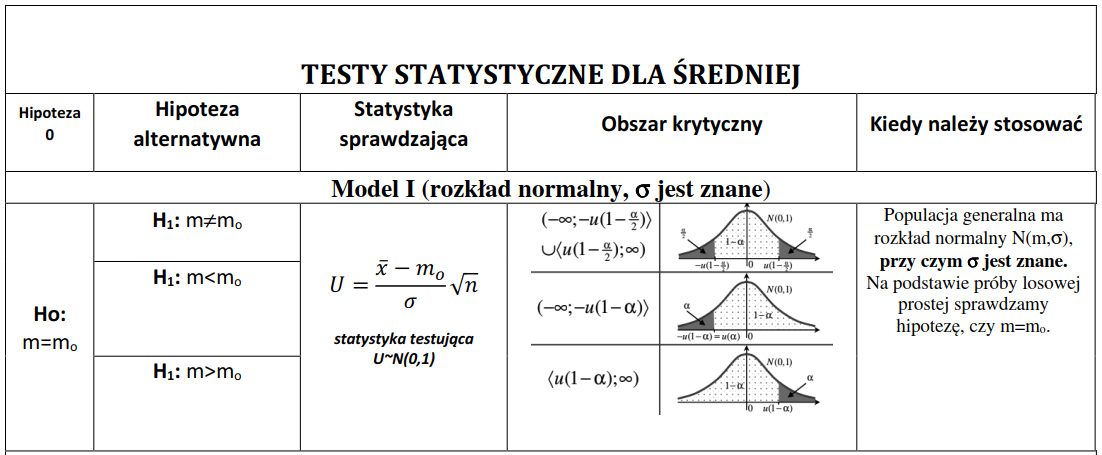

To trzeba będzie wpisać  do skryptu na kolokwium.

Ho: m=14             
 H1a ( obszar 1): m≠14 - na tym pokazuje rozwiązanie

 H1b ( obszar 1): m>14  - to wyliczacie Państwo sami
# Rozwiązanie sposób pierwszy - obszary krytyczne:

In [4]:
import math
U=((x_SR-mo)/sigma)*math.sqrt(n)
print(U)
from scipy.special import ndtri
obszar1, obszar2=[ndtri(1-alfa/2) , ndtri(1-alfa/2)]
print([obszar1, obszar2])

1.185685713257093
[-2.3263478740408408, 2.3263478740408408]


To trzeba będzie wpisać  na kolokwium:
obszar_1  (-∞,-2.3263) v  <2.3263,∞)

U=1.1307

ODP. Statystyka  U jest poza obszarem krytycznym. Różnice pomiędzy wynikami z próby, a założoną średnią m=14 są nieistotne statystycznie. Nie ma podstaw do odrzucenia Ho.



In [5]:
# Proszę wyliczyc obszar drugi do H1b :
U=((x_SR-mo)/sigma)*math.sqrt(n)
print(U)
obszar1, obszar2=[ndtri(1-alfa) , math.inf]
print([obszar1, obszar2])

1.185685713257093
[2.3263478740408408, inf]


% obszar2=

obszar_2  <   ,∞)
ODP. Na danym poziomie istotności alfa nie ma podstwa do odrzucenia hiotezy zerwoej. Różniece pomiędzy wynikami z próby, a zaożoną średnią nie są istotne statystycznie.

#Wizualizacja:

Należy utworzyć standardowy rozkład normalny. 
i wyznaczyć wartości krytyczne dla poziomu niepewności 2%  dla rozkadu normalnego N(0,1) dla przedzialu dwustronnego
zaznacz_obszary_u1 = icdf(pd,[.01,.99])

Narysuj i zaznacz obszary krytyczne

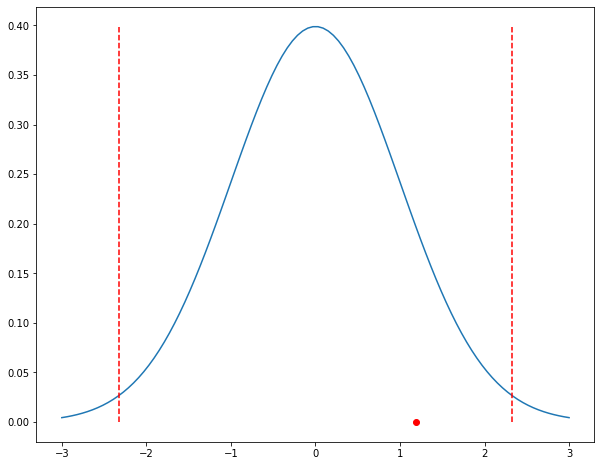

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
mu_r=0
sigma_r=1
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, mu_r, sigma_r)
plt.figure(figsize=[10,8])
plt.plot(x,y)
obszar1, obszar2=[ndtri(alfa/2) , ndtri(1-alfa/2)]
plt.plot( [obszar1, obszar1],[0, max(y)],'r--')
plt.plot( [obszar2, obszar2],[0, max(y)],'r--')
plt.plot(U,0, marker="o", color="red")


DP. Statystyka sprawdzająca U jest poza obszarem krytycznym. Różnice pomiędzy wynikami z próby, a założoną średnią m=14 są nieistotne statystycznie. Nie ma podstaw do odrzucenia Ho.



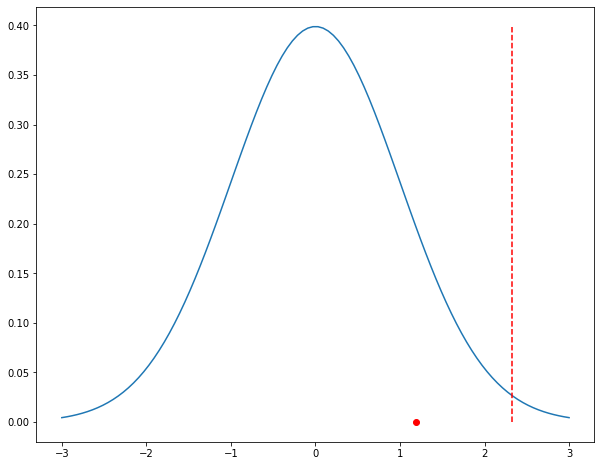

In [15]:
#Proszę zrobic wizualizację wykorzystując dla H1b (obszar 1): m>14 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
mu_r=0
sigma_r=1
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, mu_r, sigma_r)
plt.figure(figsize=[10,8])
plt.plot(x,y)
obszar1, obszar2=[ndtri(1-alfa/2) , math.inf]
plt.plot( [obszar1, obszar1],[0, max(y)],'r--')
plt.plot( [obszar2, obszar2],[0, max(y)],'r--')
plt.plot(U,0, marker="o", color="red")

Odp.

________________________________________________

#P-wartość
We wszystkich testach statystycznych wyznaczane jest tzw. "p-value" (wartość p, p-wartość).

Jest prawdopodobieństwo, że zależność jaką zaobserwowano w losowej próbie z populacji mogła wystąpić przypadkowo, wskutek losowej zmienności prób, choć w populacji wcale nie występuje.
Czyli, jeżeli p-value jest duże, to prawdopodobieństwo, że obserwowana zależność jest przypadkowa jest duże. A zatem:
jeśli wartość p-value jest mniejsza od zadanego poziomu istotności alfa, hipotezę zerową należy odrzucić na rzecz hipotezy alternatywnej.


p może być używana do oceny wartości dowodowej danych (wartości dowodów przeciwko H0), jednak jest to interpretacja obarczona licznymi zastrzeżeniami.
 Można przeczytać o nich tutaj: https://www.amstat.org/asa/files/pdfs/P-ValueStatement.pdf

In [16]:
from statsmodels.stats.weightstats import ztest
ztest_Score, p_value= ztest(proba,value =14, alternative='two-sided')
print([ 'wartość p=', p_value,' statystyka=', ztest_Score ])
# Uwaga ! W Matlabie, przewidziano ten model, w Python nie, nie można w modelu narzucić ile jest równa sigma ...
# stąd mamy pewne różnice w statytyce - policzył dla odchylenia standardowego z próby

['wartość p=', 0.2582626630772502, ' statystyka=', 1.1305069701936148]


% To trzeba będzie wpisać  na kolokwium

h=0
p=0.26

ODP. Wartość p jest większa niż poziom istotności alpha. Wartość h jest równa zero. Różnice pomiędzy wynikami z próby, a założoną średnią m=14 są nieistotne statystycznie. Nie ma podstaw do odrzucenia Ho.

*Do przemyślenia:
Czy sytuacja opisana modelem pierwszym będzie częsta w praktyce? Jak często znamy odchylenie standardowe rozkładu, z którego pochodzi dana próba?
Raczj nigdy...

In [17]:
# proszę przedstawić drugi przypadek
# alternative='larger'
from statsmodels.stats.weightstats import ztest
ztest_Score, p_value= ztest(proba,value =14, alternative='larger')
print([ 'wartość p=', p_value,' statystyka=', ztest_Score ])

['wartość p=', 0.1291313315386251, ' statystyka=', 1.1305069701936148]


Odp. do drugiego przypadku
h = 0
p = 0.13
ODP. Wartość p jest większa niż poziom istotności alpha. Wartość h jest równa zero. Różnice pomiędzy wynikami z próby, a założoną średnią m=14 są nieistotne statystycznie. Nie ma podstaw do odrzucenia Ho.

# Skąd bierze się p-value?
Statystyka testowa, którą obliczyliśmy, wynosi 1.1307. Obliczanie p-value polega na sprawdzeniu, jakie jest prawdopodobieństwo, że w wyniku losowych zmian, wyjdziemy poza obszar wyznaczony przez statystykę testową (śr +/- U*odch std. - po normalizacji mamy 0 +/- U) - jakie jest prawdopodobieńśtwo, że ustandaryzowana średnia przyjmie wartość większą lub równą od statystyki testowej? (ewentualnie mniejszą albo mniejszą lub większą - w zależności od H1. Na początek najłatwiej będzie nam to zrozumieć dla H1 postaci  m>14. Pytanie w tej sytuacji brzmi: jakie jest prawdopodobieństwo otrzymania ustandaryzownej średniej równej 1.1307 lub większej? - Na podobne pytanie odpowiada nam dystrybuanta (jakie jest prawdobodobieństwo otrzymania wartości takiej lub mniejszej?). Możemy więc sprawdzić wartość dystrubuanty w punkcie wyznaczonym przez statystykę U i odjąć to od 1 (prawdopodobieństwo musi dopełniać się do 1)





Czy ta wartość zgadza się z p-value otrzymanym z testu?
p_val_right = 1 - norm.cdf(1.1307)

Co, jeżeli mamy obszar obustronny?
Musimy zsumować prawdopodobieństwa, że średnia będzie większa od U i mniejsza od U. Czyli, wiedząć, że rozkład normalny jest rozkładem symetrycznym, wystarczy wziąć dwa razy wynik 1-dystrybuanta(U)

p_val_right =2*( 1 - norm.cdf(1.1307))
Czyli:
mała wartość p-value (mniejsza od alfa)  --> małe prawdopodobieństwo, że obserwowane odchylenie od założonej średniej jest losowe --> trzeba odrzucić H0 na rzecz H1
duża wartość p-value (większa od alfa) --> duże prawdopodobieństwo, że obserwowane odchylenie od założonej średniej jest losowe --> nie ma powodu do odrzucenia H0, obserwowana różnica jest nieistotna statystycznie


In [18]:
from scipy.stats import norm
p_val_right = 1 - norm.cdf(1.1307)
print(p_val_right)
p_val_right =2*( 1 - norm.cdf(1.1307))
print(p_val_right)

# Uwaga ! W Matlabie, przewidziano ten model, w Python nie, nie można w modelu narzucić ile jest równa sigma ...
# stąd mamy pewne różnie ( bo sigma nie jest równe idealnie 2)

0.12909069067875845
0.2581813813575169
